In [1]:
!pip install easytorch

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from easytorch import EasyTorch, ETTrainer, ConfusionMatrix
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
import torch
from IPython.display import Image

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

**Define neural network. I just burrowed from here: https://github.com/pytorch/examples/blob/master/mnist/main.py**

In [4]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [5]:
class MNISTExperiment(EasyTorch):
    def _load_dataset(self, split_key, dataspec: dict, **kw):
        if split_key == 'train':
            return datasets.MNIST('../data', train=True, download=True,
                                  transform=transform)
        elif split_key == 'validation':
            return datasets.MNIST('../data', train=False,
                                  transform=transform)

In [6]:

class MNISTTrainer(ETTrainer):
    def _init_nn_model(self):
        self.nn['model'] = MNISTNet()

    def iteration(self, batch):
        inputs = batch[0].to(self.device['gpu']).float()
        labels = batch[1].to(self.device['gpu']).long()

        out = self.nn['model'](inputs)
        loss = F.nll_loss(out, labels)

        _, pred = torch.max(out, 1)
        sc = self.new_metrics()
        sc.add(pred, labels)

        avg = self.new_averages()
        avg.add(loss.item(), len(inputs))

        return {'loss': loss, 'averages': avg, 'metrics': sc, 'predictions': pred}

    def init_experiment_cache(self):
        self.cache['log_header'] = 'Loss|Accuracy,F1,Precision,Recall'
        self.cache.update(monitor_metric='f1', metric_direction='maximize')

    def new_metrics(self):
        return ConfusionMatrix(num_classes=10)

In [8]:
runner = MNISTExperiment(phase='train', batch_size=128, epochs=3, gpus=[0])
runner.run(MNISTTrainer)


[WARNING]! 1 GPU(s) requested but GPU(s) not detected. Using CPU(Much slower).
[SUCCESS]! Starting with the following parameters:
{'batch_size': 128,
 'dataset_dir': '',
 'epochs': 3,
 'force': False,
 'gpus': [],
 'learning_rate': 0.001,
 'load_limit': 9223372036854775807,
 'load_sparse': False,
 'log_dir': 'net_logs',
 'num_folds': None,
 'num_iterations': 1,
 'num_workers': 4,
 'patience': 11,
 'phase': 'train',
 'pin_memory': False,
 'pretrained_path': None,
 'seed': 4701693,
 'seed_all': False,
 'split_ratio': None,
 'verbose': True}
[SUCCESS]! 1 split(s) loaded from 'net_logs/experiment/splits' directory.
[SUCCESS]! Total params in model: 1199882
Training ...
Ep:1/3,Itr:1/469,[3.95102],[0.125, 0.11777, 0.11979, 0.11581]
Ep:1/3,Itr:2/469,[5.65358],[0.17188, 0.14678, 0.1752, 0.12629]
Ep:1/3,Itr:3/469,[4.09082],[0.28125, 0.30648, 0.26678, 0.36005]
Ep:1/3,Itr:4/469,[2.38648],[0.38281, 0.3436, 0.339, 0.34832]
Ep:1/3,Itr:5/469,[2.37338],[0.39844, 0.42607, 0.39829, 0.45801]
Ep:1/3,Itr:

Ep:1/3,Itr:119/469,[0.27769],[0.91406, 0.91846, 0.91938, 0.91755]
Ep:1/3,Itr:120/469,[0.21859],[0.92188, 0.91326, 0.90873, 0.91784]
Ep:1/3,Itr:121/469,[0.29745],[0.89062, 0.89773, 0.88655, 0.9092]
Ep:1/3,Itr:122/469,[0.32813],[0.92188, 0.91576, 0.90804, 0.92361]
Ep:1/3,Itr:123/469,[0.39608],[0.91406, 0.91418, 0.91761, 0.91077]
Ep:1/3,Itr:124/469,[0.19127],[0.96875, 0.96522, 0.96384, 0.96661]
Ep:1/3,Itr:125/469,[0.1993],[0.94531, 0.95489, 0.95524, 0.95455]
Ep:1/3,Itr:126/469,[0.15325],[0.94531, 0.94863, 0.95178, 0.94551]
Ep:1/3,Itr:127/469,[0.22206],[0.92188, 0.91749, 0.91602, 0.91897]
Ep:1/3,Itr:128/469,[0.39615],[0.89844, 0.89962, 0.89591, 0.90336]
Ep:1/3,Itr:129/469,[0.36333],[0.89062, 0.88396, 0.88274, 0.88518]
Ep:1/3,Itr:130/469,[0.27644],[0.91406, 0.90992, 0.91368, 0.90619]
Ep:1/3,Itr:131/469,[0.34985],[0.91406, 0.90282, 0.90961, 0.89614]
Ep:1/3,Itr:132/469,[0.32121],[0.88281, 0.88867, 0.89531, 0.88212]
Ep:1/3,Itr:133/469,[0.39669],[0.90625, 0.89873, 0.8962, 0.90126]
Ep:1/3,Itr:13

Ep:1/3,Itr:245/469,[0.21432],[0.94531, 0.95175, 0.95555, 0.94799]
Ep:1/3,Itr:246/469,[0.27655],[0.91406, 0.9121, 0.91516, 0.90907]
Ep:1/3,Itr:247/469,[0.23028],[0.9375, 0.93148, 0.93387, 0.9291]
Ep:1/3,Itr:248/469,[0.21587],[0.92969, 0.92905, 0.92706, 0.93106]
Ep:1/3,Itr:249/469,[0.20705],[0.96094, 0.96105, 0.96234, 0.95977]
Ep:1/3,Itr:250/469,[0.17367],[0.95312, 0.95422, 0.95389, 0.95456]
Ep:1/3,Itr:251/469,[0.17333],[0.94531, 0.9461, 0.94716, 0.94503]
Ep:1/3,Itr:252/469,[0.21828],[0.90625, 0.90651, 0.92254, 0.89103]
Ep:1/3,Itr:253/469,[0.25352],[0.92969, 0.9315, 0.92572, 0.93735]
Ep:1/3,Itr:254/469,[0.15712],[0.95312, 0.95375, 0.95465, 0.95286]
Ep:1/3,Itr:255/469,[0.12548],[0.95312, 0.94943, 0.95261, 0.94628]
Ep:1/3,Itr:256/469,[0.21569],[0.95312, 0.95184, 0.95054, 0.95314]
Ep:1/3,Itr:257/469,[0.1961],[0.92969, 0.93412, 0.92468, 0.94377]
Ep:1/3,Itr:258/469,[0.21142],[0.92188, 0.92386, 0.91927, 0.92849]
Ep:1/3,Itr:259/469,[0.13348],[0.95312, 0.94977, 0.94722, 0.95232]
Ep:1/3,Itr:260/4

Ep:1/3,Itr:371/469,[0.24158],[0.94531, 0.94686, 0.94856, 0.94517]
Ep:1/3,Itr:372/469,[0.15404],[0.95312, 0.94931, 0.95286, 0.94578]
Ep:1/3,Itr:373/469,[0.07887],[0.97656, 0.96852, 0.97037, 0.96667]
Ep:1/3,Itr:374/469,[0.13006],[0.97656, 0.97543, 0.97341, 0.97746]
Ep:1/3,Itr:375/469,[0.1713],[0.95312, 0.95653, 0.9524, 0.96069]
Ep:1/3,Itr:376/469,[0.1294],[0.94531, 0.94919, 0.958, 0.94055]
Ep:1/3,Itr:377/469,[0.19755],[0.95312, 0.95392, 0.95178, 0.95607]
Ep:1/3,Itr:378/469,[0.20411],[0.94531, 0.94389, 0.95515, 0.93289]
Ep:1/3,Itr:379/469,[0.12169],[0.94531, 0.9401, 0.94003, 0.94018]
Ep:1/3,Itr:380/469,[0.13569],[0.96094, 0.95293, 0.95593, 0.94995]
Ep:1/3,Itr:381/469,[0.13849],[0.97656, 0.97674, 0.97591, 0.97758]
Ep:1/3,Itr:382/469,[0.13346],[0.96875, 0.96417, 0.96333, 0.965]
Ep:1/3,Itr:383/469,[0.07438],[0.97656, 0.97202, 0.97466, 0.96939]
Ep:1/3,Itr:384/469,[0.11915],[0.95312, 0.95474, 0.96424, 0.94542]
Ep:1/3,Itr:385/469,[0.12897],[0.97656, 0.9756, 0.98117, 0.97009]
Ep:1/3,Itr:386/469,

 Itr:32/79,[0.06914],[0.96094, 0.96317, 0.96003, 0.96634]
 Itr:33/79,[0.05686],[0.96875, 0.97253, 0.97248, 0.97258]
 Itr:34/79,[0.06371],[0.96875, 0.96038, 0.96395, 0.95685]
 Itr:35/79,[0.06644],[0.96875, 0.96996, 0.96758, 0.97235]
 Itr:36/79,[0.10781],[0.95312, 0.95793, 0.95648, 0.95937]
 Itr:37/79,[0.04137],[0.98438, 0.98575, 0.98452, 0.98697]
 Itr:38/79,[0.10512],[0.97656, 0.9777, 0.98176, 0.97367]
 Itr:39/79,[0.07469],[0.97656, 0.97583, 0.97322, 0.97845]
 Itr:40/79,[0.00239],[1.0, 1.0, 1.0, 1.0]
 Itr:41/79,[0.00947],[1.0, 1.0, 1.0, 1.0]
 Itr:42/79,[0.01024],[1.0, 1.0, 1.0, 1.0]
 Itr:43/79,[0.00234],[1.0, 1.0, 1.0, 1.0]
 Itr:44/79,[0.00666],[1.0, 1.0, 1.0, 1.0]
 Itr:45/79,[0.03152],[0.99219, 0.99286, 0.99286, 0.99286]
 Itr:46/79,[0.01182],[1.0, 1.0, 1.0, 1.0]
 Itr:47/79,[0.10429],[0.96094, 0.95878, 0.95923, 0.95833]
 Itr:48/79,[0.05311],[0.98438, 0.98361, 0.98182, 0.98542]
 Itr:49/79,[0.02606],[0.99219, 0.9925, 0.99333, 0.99167]
 Itr:50/79,[0.00075],[1.0, 1.0, 1.0, 1.0]
 Itr:51/79,[

Ep:2/3,Itr:308/469,[0.10228],[0.98047, 0.98157, 0.98166, 0.98149]
Ep:2/3,Itr:312/469,[0.09972],[0.97266, 0.97317, 0.97392, 0.97243]
Ep:2/3,Itr:316/469,[0.15183],[0.95898, 0.95909, 0.9589, 0.95928]
Ep:2/3,Itr:320/469,[0.13721],[0.96094, 0.96207, 0.96182, 0.96232]
Ep:2/3,Itr:325/469,[0.09879],[0.9625, 0.96303, 0.96306, 0.963]
Ep:2/3,Itr:330/469,[0.07534],[0.97969, 0.9795, 0.97872, 0.98028]
Ep:2/3,Itr:335/469,[0.10502],[0.96719, 0.96757, 0.96707, 0.96808]
Ep:2/3,Itr:340/469,[0.0962],[0.96875, 0.96828, 0.96828, 0.96829]
Ep:2/3,Itr:345/469,[0.11234],[0.97031, 0.97048, 0.97056, 0.97041]
Ep:2/3,Itr:350/469,[0.11203],[0.96875, 0.96809, 0.96893, 0.96726]
Ep:2/3,Itr:355/469,[0.08395],[0.975, 0.97416, 0.97368, 0.97465]
Ep:2/3,Itr:360/469,[0.08581],[0.97656, 0.9766, 0.97729, 0.9759]
Ep:2/3,Itr:365/469,[0.10813],[0.96875, 0.96764, 0.96771, 0.96758]
Ep:2/3,Itr:370/469,[0.13111],[0.95937, 0.95893, 0.95879, 0.95906]
Ep:2/3,Itr:375/469,[0.06998],[0.97813, 0.97795, 0.97866, 0.97723]
Ep:2/3,Itr:380/469,[

Ep:3/3,Itr:357/469,[0.06289],[0.97991, 0.97989, 0.97987, 0.97992]
Ep:3/3,Itr:364/469,[0.07432],[0.97433, 0.97405, 0.97355, 0.97454]
Ep:3/3,Itr:371/469,[0.06015],[0.98549, 0.98509, 0.98476, 0.98542]
Ep:3/3,Itr:378/469,[0.05081],[0.98438, 0.98463, 0.98431, 0.98496]
Ep:3/3,Itr:385/469,[0.06614],[0.98103, 0.98071, 0.9799, 0.98153]
Ep:3/3,Itr:392/469,[0.08965],[0.96987, 0.96989, 0.97028, 0.9695]
Ep:3/3,Itr:399/469,[0.0868],[0.97433, 0.97371, 0.97386, 0.97357]
Ep:3/3,Itr:406/469,[0.07843],[0.97545, 0.97528, 0.97554, 0.97502]
Ep:3/3,Itr:413/469,[0.05474],[0.97768, 0.97775, 0.978, 0.9775]
Ep:3/3,Itr:420/469,[0.07604],[0.97545, 0.97538, 0.97521, 0.97555]
Ep:3/3,Itr:427/469,[0.05722],[0.98549, 0.98543, 0.98564, 0.98522]
Ep:3/3,Itr:434/469,[0.07243],[0.97433, 0.97473, 0.97449, 0.97497]
Ep:3/3,Itr:441/469,[0.08986],[0.97656, 0.97677, 0.97635, 0.97719]
Ep:3/3,Itr:448/469,[0.08399],[0.98214, 0.98241, 0.9825, 0.98232]
Ep:3/3,Itr:455/469,[0.06968],[0.97656, 0.97678, 0.97699, 0.97657]
Ep:3/3,Itr:462/46

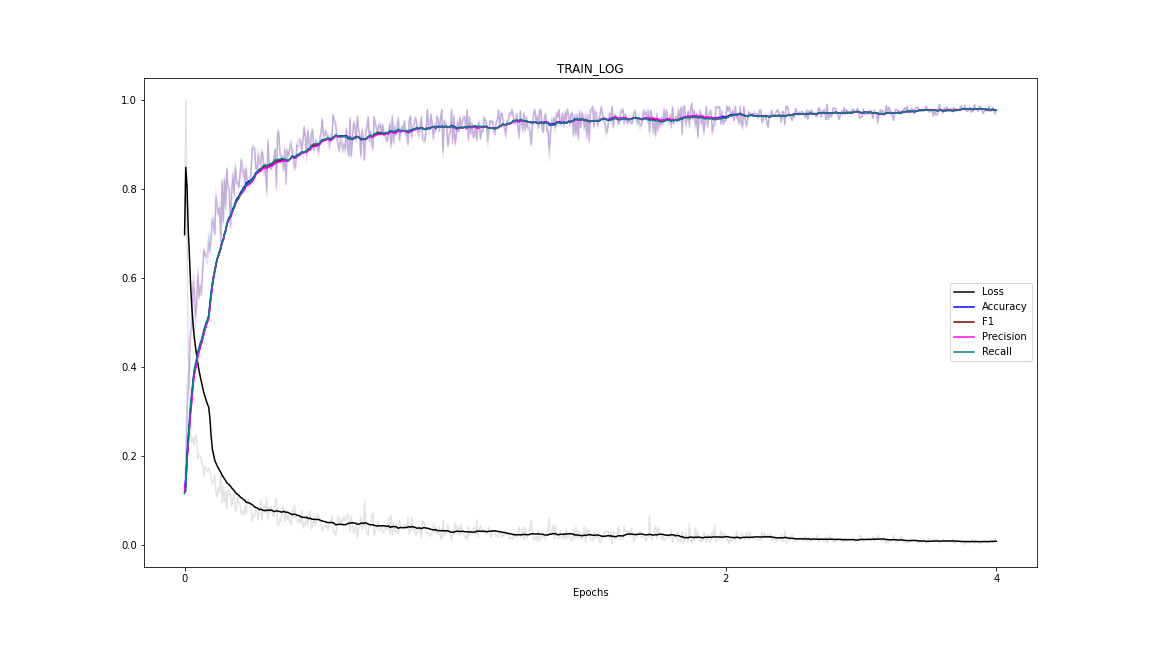

In [12]:
Image('net_logs/experiment/experiment_train_log.png')